In [1]:
import numpy as np
import pandas as pd
from matplotlib import colors
import matplotlib.pyplot as plt
import Curves2D

In [2]:
path_lin='/home/ramiro/Facultad/Tesis/Python/Descarga de datos para diferentes catálogos/'

Hay snap=28,19,15,12, que representan z=0,1,2,3

In [3]:
snap=12

Medias de MZR calculadas para galaxias >10^10 masas solares con SF_Oxygen y SF_Hydrogen >0:

In [4]:
Snap = pd.read_csv(path_lin+'Aperturas_RefL0100N1504_snap_'+str(snap)+'.dat')

In [5]:
xvar = np.log10(Snap['Stars_Mass'])
yvar = 12+np.log10(Snap['SF_Oxygen']/Snap['SF_Hydrogen'])-np.log10(16)

In [6]:
# Parmetros para determinar la curva mediana y errores
nbins=1        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,perc_low=perc_low,perc_high=perc_high)

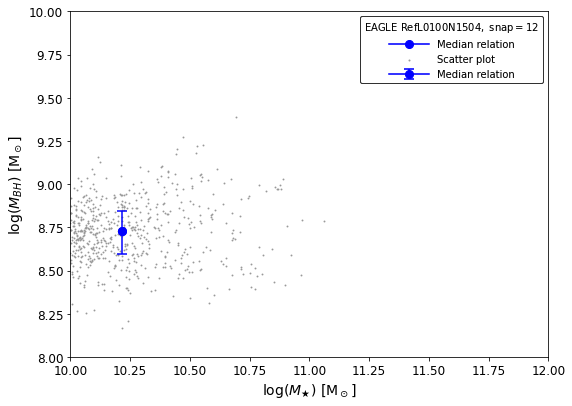

In [7]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(10,12)
ylim=(8,10)

xlabel=r'$\log(M_\bigstar) \ [\rm{M}_\odot]$'
ylabel=r'$\log(M_{BH}) \ [\rm{M}_\odot]}$'

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=12)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.6',label='Scatter plot')

#----------------------------------------------------------------------------------------------------
# Curva mediana simple con marcadores

ax.plot(xmedian,ymedian,c='b',marker='o',ms=8,linestyle='-',linewidth=1.5,label='Median relation')

#----------------------------------------------------------------------------------------------------
# Curva mediana con barras de error y marcadores

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='b',marker='o',markersize=8,linestyle='-',
           linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

#----------------------------------------------------------------------------------------------------

# Curva mediana con barras de error, con marcadores 'especiales' si hay pocos elementos

# Mascara para graficar solo bines con cierto numero de elementos
#mask_lim=(elements>=100)

# Curva mediana con barras de error, sin marcadores
#ax.errorbar(xmedian,ymedian,yerr=yerror,
#            c='b',marker='',linestyle='-',
#            linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

leg1=ax.legend(edgecolor='0.1',loc='upper right',handlelength=4,fontsize=10)
leg1.set_title(r'$\rm{EAGLE\ RefL0100N1504},\ snap='+str(snap)+'$',prop={'size':10})

# Marcadores
#scat1=ax.scatter(xmedian[~mask_lim],ymedian[~mask_lim],s=80,edgecolor='b',facecolors='w',
#                 label=r'$N < 100$')

#scat2=ax.scatter(xmedian[mask_lim],ymedian[mask_lim],s=80,color='b',
#                 label=r'$N\ \geqslant \ 100$')

#leg2=ax.legend(edgecolor='w',loc='lower right',handles=[scat1,scat2],fontsize=12)

ax.add_artist(leg1)

#-----------------------------------------------------------------------------------------------------



plt.show()
#plt.savefig('prueba_scatter.png')

In [59]:
xmedian

array([10.21403824])

In [60]:
ymedian

array([8.72611757])